In [3]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime,date

import numpy as np
from pandas import read_excel
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import statsmodels.api as sm
import re


from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from sklearn.datasets import load_files
from unidecode import unidecode
from mpl_toolkits import mplot3d

from nltk.tokenize import word_tokenize

from wordcloud import WordCloud,STOPWORDS


import tweepy as tw
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob

In [4]:
#Api secret criado no app do twitter
consumer_key = '####################'
consumer_secret = '####################'
access_token = '####################'
acces_token_secret = '####################'

In [26]:
# # # # TWITTER CLIENT # # # #
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets


# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_token, acces_token_secret)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)


# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)


class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    """
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        df['id'] = np.array([tweet.id for tweet in tweets])
        df['len'] = np.array([len(tweet.text) for tweet in tweets])
        df['date'] = np.array([tweet.created_at for tweet in tweets])
        df['source'] = np.array([tweet.source for tweet in tweets])
        df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

 
 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="@localizahertz", count=1000)

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    #df['sentiment'] = np.array([TweetAnalyzer.analyze_sentiment(tweet) for tweet in df['Tweets']])
    print(df.head(10))


                                              Tweets                   id  \
0  @mrvoficial @rubensmenin @Bancointer @meuBMG @...  1245382874901164038   
1  @lilacarol @libertyseguros Nos informe por DM ...  1245341938372546566   
2  @GastGonzalez_ Te contestamos por mensaje priv...  1245091360484536321   
3  @Diogo_Tonin Oi Diogo,\nEstamos com os nossos ...  1244985807330574336   
4  @marcondeslex Oi Luis. Por favor, envie uma me...  1244388359373565952   
5  @luizlima86 Luiz, envie por DM uma mensagem re...  1244387950189838336   
6  @DiegoGaik Infelizmente até o momento o nosso ...  1244387668278075392   
7  @JonathaBarroz Oi Jonatha,\nOs nossos sistemas...  1243614222132695041   
8  @rafaelroberto Olá Rafael! 😊\nNo momento nosso...  1243525704584769537   
9  @Diego_de_Brito Oi Diego, \nEstamos tratando c...  1243522205541109761   

   len                date           source  likes  retweets  
0  124 2020-04-01 16:09:50  Twitter Web App      1         0  
1  131 2020-04-01 13:27:10

In [13]:
df.head()

,Tweets,id,len,date,source,likes,retweets
0,@mrvoficial @rubensmenin @Bancointer @meuBMG @...,1245382874901164038,124,2020-04-01 16:09:50,Twitter Web App,1,0
1,@lilacarol @libertyseguros Nos informe por DM ...,1245341938372546566,131,2020-04-01 13:27:10,Stilingue,0,0
2,@GastGonzalez_ Te contestamos por mensaje priv...,1245091360484536321,52,2020-03-31 20:51:27,Stilingue,0,0
3,"@Diogo_Tonin Oi Diogo,\nEstamos com os nossos ...",1244985807330574336,139,2020-03-31 13:52:01,Stilingue,0,0
4,"@marcondeslex Oi Luis. Por favor, envie uma me...",1244388359373565952,139,2020-03-29 22:17:59,Stilingue,0,0


In [25]:
#remove números e caracteres especiais 
df['Tweets2'] = df['Tweets'].apply(lambda x: re.sub('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)', '', x))

df['Tweets2'] = df['Tweets'].apply(lambda x: re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', '', x))


#remove acentos 
df['Tweets2'] = df['Tweets'].apply(lambda x: unidecode(x))

df['Tweets2'] = df['Tweets'].apply(lambda x: re.sub(r"http\S+", '', x))


#converte as palavras para seu radical 
stemmer = nltk.stem.RSLPStemmer()
df['Tweets2'] = df['Tweets'].apply(lambda x: stemmer.stem(x))

df.head()

,Tweets,id,len,date,source,likes,retweets,Tweets2
0,@GastGonzalez_ Te contestamos por mensaje priv...,1245091360484536321,52,2020-03-31 20:51:27,Stilingue,0,0,@gastgonzalez_ te contestamos por mensaje priv...
1,"@Diogo_Tonin Oi Diogo,\nEstamos com os nossos ...",1244985807330574336,139,2020-03-31 13:52:01,Stilingue,0,0,"@diogo_tonin oi diogo,\nestamos com os nossos ..."
2,"@marcondeslex Oi Luis. Por favor, envie uma me...",1244388359373565952,139,2020-03-29 22:17:59,Stilingue,0,0,"@marcondeslex oi luis. por favor, envie uma me..."
3,"@luizlima86 Luiz, envie por DM uma mensagem re...",1244387950189838336,139,2020-03-29 22:16:21,Stilingue,0,0,"@luizlima86 luiz, envie por dm uma mensagem re..."
4,@DiegoGaik Infelizmente até o momento o nosso ...,1244387668278075392,140,2020-03-29 22:15:14,Stilingue,0,0,@diegogaik infelizmente até o momento o nosso ...


In [26]:
df['Tweets2'] = df['Tweets2'].str.replace('@','')

df.head()

,Tweets,id,len,date,source,likes,retweets,Tweets2
0,@GastGonzalez_ Te contestamos por mensaje priv...,1245091360484536321,52,2020-03-31 20:51:27,Stilingue,0,0,gastgonzalez_ te contestamos por mensaje priva...
1,"@Diogo_Tonin Oi Diogo,\nEstamos com os nossos ...",1244985807330574336,139,2020-03-31 13:52:01,Stilingue,0,0,"diogo_tonin oi diogo,\nestamos com os nossos s..."
2,"@marcondeslex Oi Luis. Por favor, envie uma me...",1244388359373565952,139,2020-03-29 22:17:59,Stilingue,0,0,"marcondeslex oi luis. por favor, envie uma men..."
3,"@luizlima86 Luiz, envie por DM uma mensagem re...",1244387950189838336,139,2020-03-29 22:16:21,Stilingue,0,0,"luizlima86 luiz, envie por dm uma mensagem rel..."
4,@DiegoGaik Infelizmente até o momento o nosso ...,1244387668278075392,140,2020-03-29 22:15:14,Stilingue,0,0,diegogaik infelizmente até o momento o nosso s...


In [58]:
#df[df['id'].duplicated()].tail()
# nltk.download('stopwords') 
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend(['de','a','o','que','e','do','da','em','um','para','e','com','uma','os','no','se','na','nao','por','mais','as','dos','como','mas',
                 'foi','ao','ele','das','tem','à','seu','sua','ou','ser','quando','muito','ha','nos','ja','esta','eu','tambem','so','pelo',
                 'pela','ate','isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem','nas','me','esse','eles','estao',
                 'voce','tinha','foram','essa','num','nem','suas','meu','às','minha','têm','numa','pelos','elas','havia','seja','qual','sera',
                 'nos','tenho','lhe','deles','essas','esses','pelas','este','fosse','dele','tu','te','vocês','vos','lhes','meus','minhas','teu',
                 'tua','teus','tuas','nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles','aquelas',
                 'isto','aquilo','estou','esta','estamos','estao','estive','esteve','estivemos','estiveram','estava','estavamos','estavam','estivera',
                 'estiveramos','esteja','estejamos','estejam','estivesse','estivessemos','estivessem','estiver','estivermos','estiverem','hei','ha','havemos',
                 'hão','houve','houvemos','houveram','houvera','houveramos','haja','hajamos','hajam','houvesse','houvessemos','houvessem','houver','houvermos',
                 'houverem','houverei','houvera','houveremos','houverão','houveria','houveríamos','houveriam','sou','somos','sao','era','eramos','eram','fui',
                 'foi','fomos','foram','fora','foramos','seja','sejamos','sejam','fosse','fossemos','fossem','for','formos','forem','serei','sera','seremos',
                 'serao','seria','seríamos','seriam','tenho','tem','temos','tem','tinha','tinhamos','tinham','tive','teve','tivemos','tiveram','tivera','tiveramos',
                 'tenha','tenhamos','tenham','tivesse','vc','oi','gt','https', 'dm', 'co', 'olá', 'cpf', 'ddd', 'possamos'
                  'tivessemos','tivessem','tiver','tivermos','tiverem','terei','tera','teremos','terao','teria','teriamos','teriam'])
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(df.Tweets2.values)
features = vec.transform(df.Tweets2.values)

In [59]:
df['size'] = df['Tweets2'].apply(len)
#filtrando data

df.head()

,Tweets,id,len,date,source,likes,retweets,Tweets2,size
0,@GastGonzalez_ Te contestamos por mensaje priv...,1245091360484536321,52,2020-03-31 20:51:27,Stilingue,0,0,gastgonzalez_ te contestamos por mensaje priva...,51
1,"@Diogo_Tonin Oi Diogo,\nEstamos com os nossos ...",1244985807330574336,139,2020-03-31 13:52:01,Stilingue,0,0,"diogo_tonin oi diogo,\nestamos com os nossos s...",138
2,"@marcondeslex Oi Luis. Por favor, envie uma me...",1244388359373565952,139,2020-03-29 22:17:59,Stilingue,0,0,"marcondeslex oi luis. por favor, envie uma men...",138
3,"@luizlima86 Luiz, envie por DM uma mensagem re...",1244387950189838336,139,2020-03-29 22:16:21,Stilingue,0,0,"luizlima86 luiz, envie por dm uma mensagem rel...",138
4,@DiegoGaik Infelizmente até o momento o nosso ...,1244387668278075392,140,2020-03-29 22:15:14,Stilingue,0,0,diegogaik infelizmente até o momento o nosso s...,139


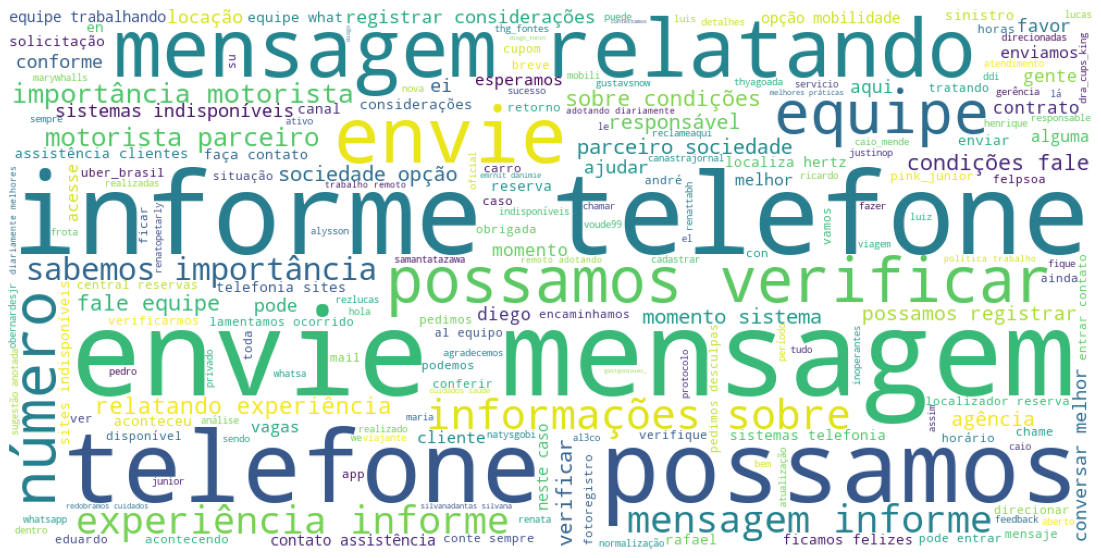

In [62]:
### Word CLoud
#Plotando uma nuvem de palavras para o nosso conjunto de texto

word_cloud = WordCloud(width = 1000, height = 500, 
                       stopwords = stopwords, background_color = 'white').generate(''.join(df['Tweets2']))


plt.figure(figsize = (20,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [65]:
df2 = df[(df['date'] >= '2020-03-22') 
                                   & (df['date'] <= '2020-03-31')] 
df2.head()

,Tweets,id,len,date,source,likes,retweets,Tweets2,size
2,"@marcondeslex Oi Luis. Por favor, envie uma me...",1244388359373565952,139,2020-03-29 22:17:59,Stilingue,0,0,"marcondeslex oi luis. por favor, envie uma men...",138
3,"@luizlima86 Luiz, envie por DM uma mensagem re...",1244387950189838336,139,2020-03-29 22:16:21,Stilingue,0,0,"luizlima86 luiz, envie por dm uma mensagem rel...",138
4,@DiegoGaik Infelizmente até o momento o nosso ...,1244387668278075392,140,2020-03-29 22:15:14,Stilingue,0,0,diegogaik infelizmente até o momento o nosso s...,139
5,"@JonathaBarroz Oi Jonatha,\nOs nossos sistemas...",1243614222132695041,127,2020-03-27 19:01:50,Stilingue,0,0,"jonathabarroz oi jonatha,\nos nossos sistemas ...",123
6,@rafaelroberto Olá Rafael! 😊\nNo momento nosso...,1243525704584769537,140,2020-03-27 13:10:06,Stilingue,0,0,rafaelroberto olá rafael! 😊\nno momento nossos...,139


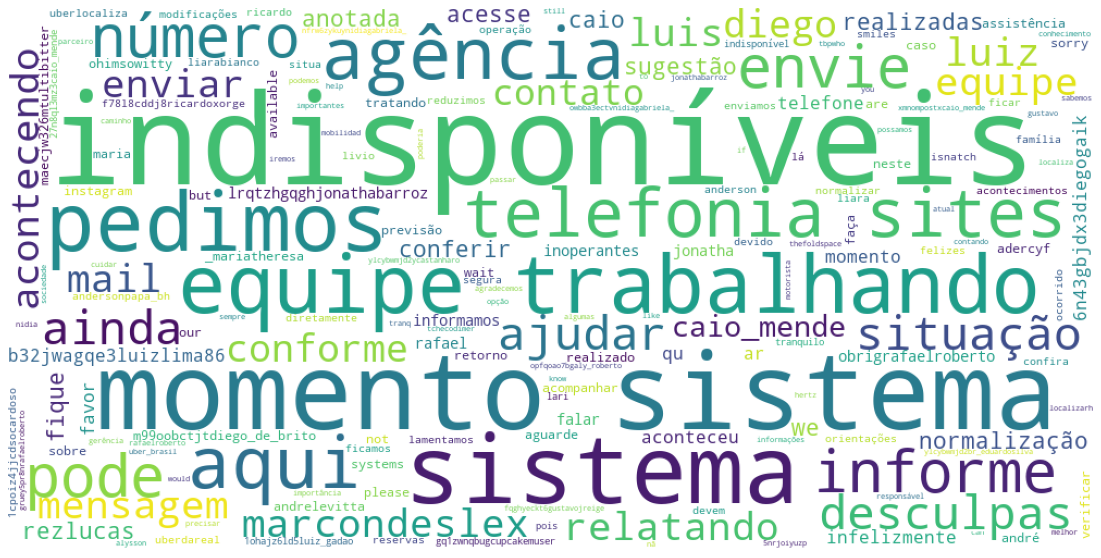

In [66]:
### Word CLoud
#Plotando uma nuvem de palavras para o nosso conjunto de texto

word_cloud = WordCloud(width = 1000, height = 500, 
                       stopwords = stopwords, background_color = 'white').generate(''.join(df2['Tweets2']))


plt.figure(figsize = (20,10))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

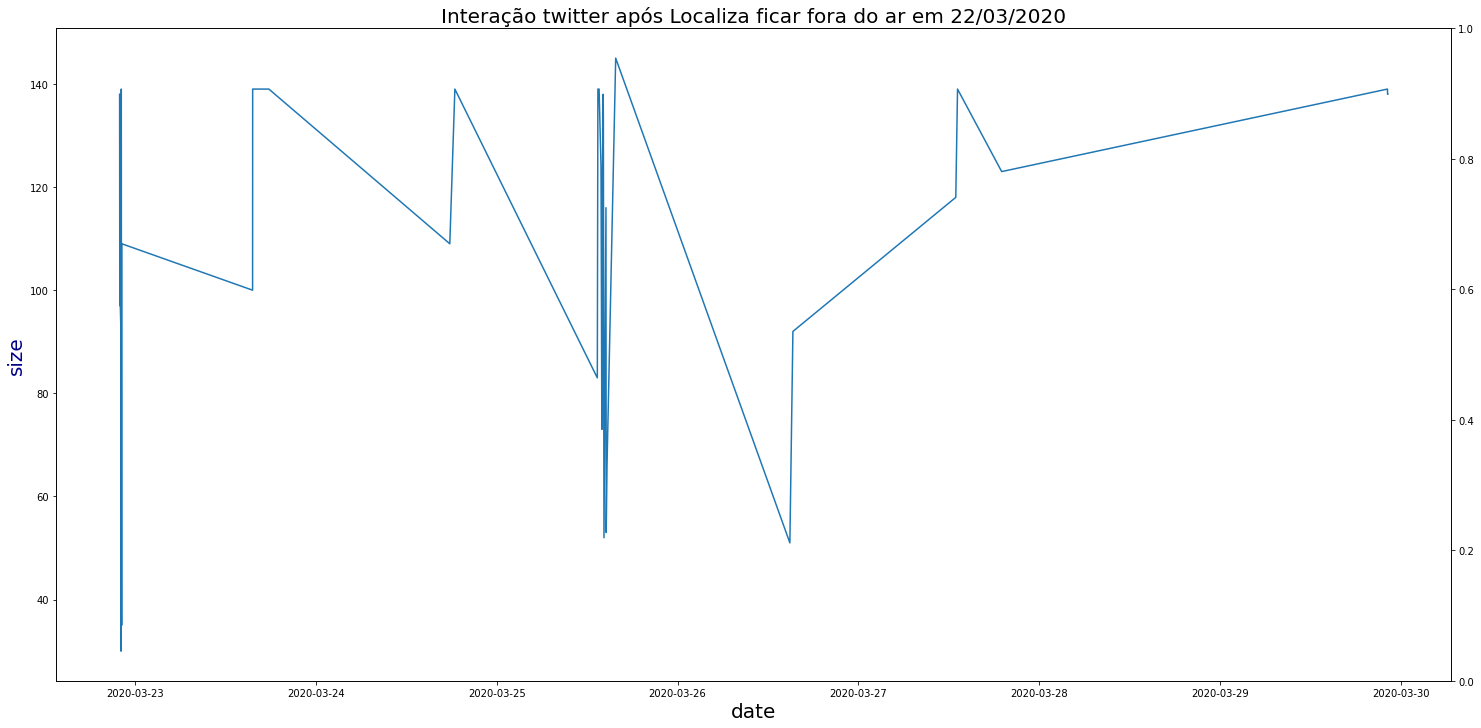

In [79]:
#Gráfico que apresenta os números de casos crescente do COVID-19 e taxa de cancelamento da reservas
fig, ax1 = plt.subplots(figsize=(25,12))
color = 'darkblue'
ax1.set_title('Interação twitter após Localiza ficar fora do ar em 22/03/2020', fontsize=20)
ax1.set_xlabel('Dias', fontsize=20)
ax1.set_ylabel('teste', fontsize=20, color=color)
ax2 = sns.lineplot(x='date', y='size', data = df2, palette='OrRd') 
ax1.tick_params(axis='y')
ax2 = ax1.twinx()

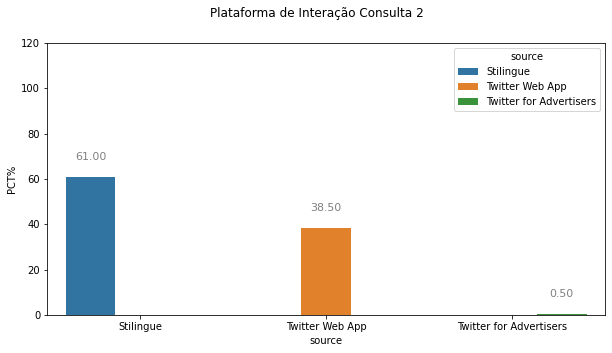

In [82]:
#Proporção de idades que são válidas
z = df.groupby('source')['id'].count().reset_index()
z['PCT%'] = round(100 * z['id']  / z['id'].sum(),2)
z

#Gráfico com a validação das idades
fig = plt.figure(figsize=(10,5))
fig.suptitle('Plataforma de Interação Consulta 2')
g1 = sns.barplot(x="source", y="PCT%", data=z, hue="source")

ax = g1

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
_ = g1.set_ylim(0,120) #To make space for the annotations

In [73]:
df.to_excel('tweets.xlsx', index=False)